In [3]:
import pandas as pd

A = pd.read_csv("C:/Users/Anoop Srivastava/Desktop/Data Science Stuff/Data Science notes/Projects discussed in class (Hackathon and others)/Hackathon_07_June_2020/training_set.csv")
# training data

B = pd.read_csv("C:/Users/Anoop Srivastava/Desktop/Data Science Stuff/Data Science notes/Projects discussed in class (Hackathon and others)\Hackathon_07_June_2020/testing_set.csv")
# testing data

In [4]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## We are checking below for missing data in dataset A

In [6]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

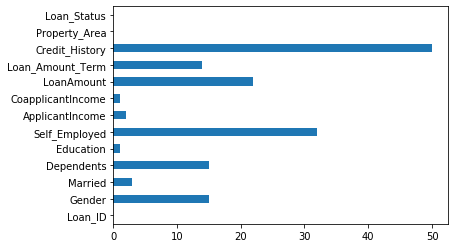

In [7]:
A.isna().sum().plot(kind='barh')

In [8]:
# Dividing the columns of 'A' into continuous and categorical columns

cat = []
con = []

for i in A.columns:
    if (A[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

## Missing Data Treatment for continuous columns in dataset 'A'

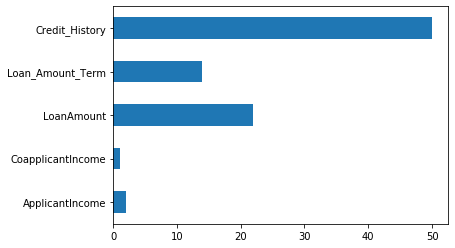

In [9]:
A[con].isna().sum().plot(kind='barh')

In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
A1 = pd.DataFrame(imp.fit_transform(A[con]), columns=con)

## Missing Data Treatment for categorical columns in dataset 'A'

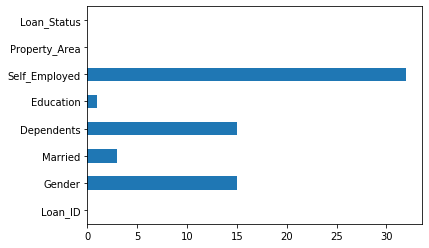

In [11]:
A[cat].isna().sum().plot(kind='barh')

In [12]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
A2 = pd.DataFrame(imp.fit_transform(A[cat]), columns=cat)

# We can also do the above process using 'CategoricalImputer'

In [13]:
A = A1.join(A2)

In [14]:
A = A.drop(labels='Loan_ID', axis=1)

## We are checking below for missing data in dataset 'B'

In [15]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

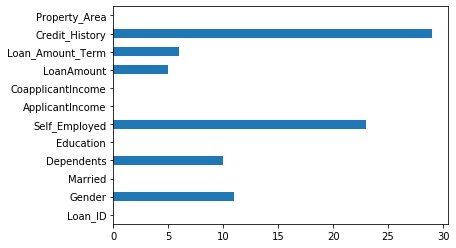

In [16]:
B.isna().sum().plot(kind='barh')

In [17]:
# Dividing the columns of 'B' into continuous and categorical columns

cat1 = []
con1 = []

for i in B.columns:
    if (B[i].dtypes=='object'):
        cat1.append(i)
    else:
        con1.append(i)

## Missing Data Treatment for continuous columns in dataset 'B'

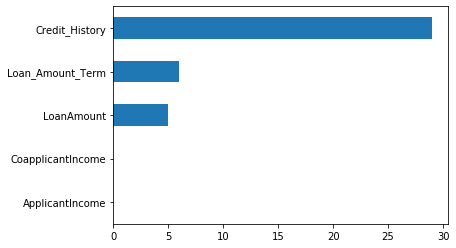

In [18]:
B[con1].isna().sum().plot(kind='barh')

In [19]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
B1 = pd.DataFrame(imp.fit_transform(B[con1]), columns=con1)

## Missing Data Treatment for categorical columns in dataset 'B'

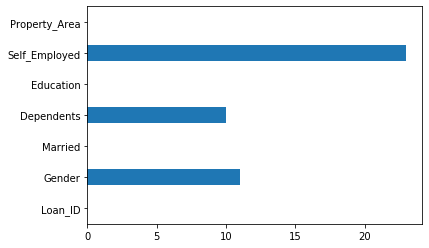

In [20]:
B[cat1].isna().sum().plot(kind='barh')

In [21]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
B2 = pd.DataFrame(imp.fit_transform(B[cat1]), columns=cat1)

# We can also do the above process using 'CategoricalImputer'

In [22]:
B = B1.join(B2)

In [23]:
B = B.drop(labels='Loan_ID', axis=1)

### Now there should be no missing values in datasets 'A' and 'B'

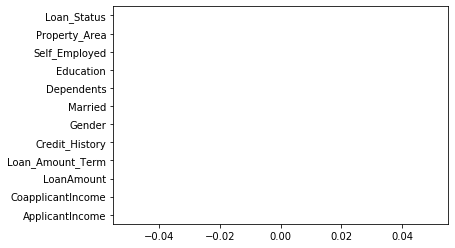

In [24]:
A.isna().sum().plot(kind='barh')

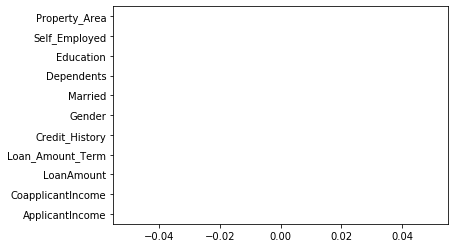

In [25]:
B.isna().sum().plot(kind='barh')

# 1.    Check eligibility of the Customer given the inputs described above.

In [26]:
Y = A[['Loan_Status']]

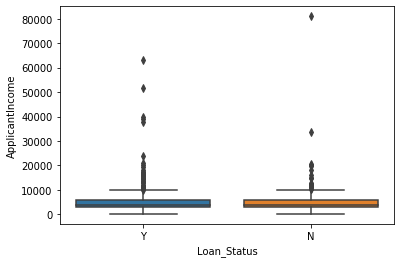

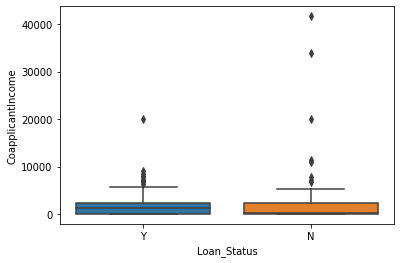

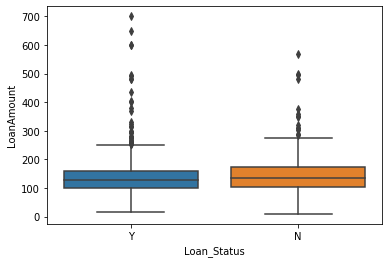

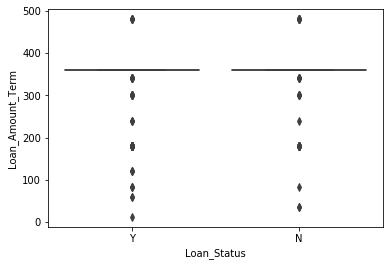

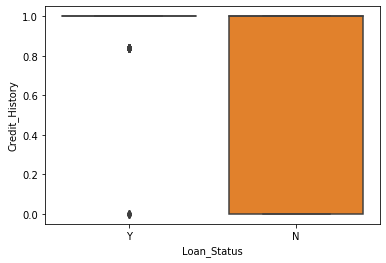

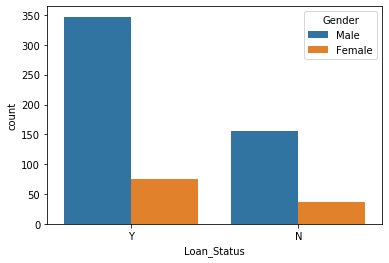

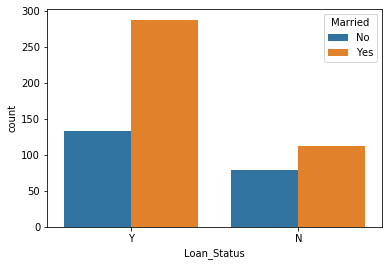

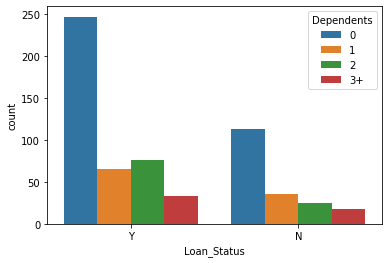

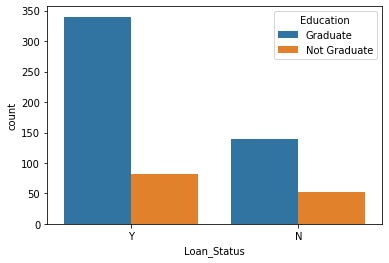

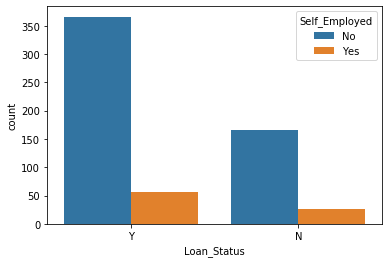

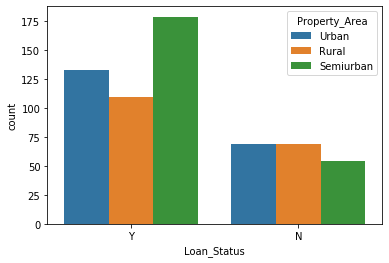

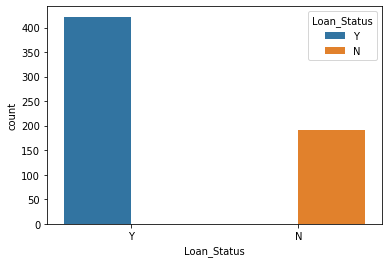

In [27]:
# Checking the Linearity/Non-Linearity of the column 'Loan_Status' with the other columns

import seaborn as sb
import matplotlib.pyplot as plt

for i in A.columns:
    if (A[i].dtypes=='object'):
        sb.countplot(A['Loan_Status'], hue=A[i])
    else:
        sb.boxplot(A['Loan_Status'], A[i])
    plt.show()

In [28]:
A.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Divide the training and testing data in such a manner that dataset 'A' is used for training (xtrain and ytrain) and dataset 'B' is used for testing (xtest)

In [29]:
A.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.00000,0.0,146.412162,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,5405.54085,1508.0,128.000000,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N


In [30]:
B.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720.0,0.0,110.0,360.0,1.0,Male,Yes,0,Graduate,No,Urban
1,3076.0,1500.0,126.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban


In [31]:
xtrain = A.drop(labels='Loan_Status', axis=1)
ytrain = A[['Loan_Status']]

xtest = B
# ytest = needs to be predicted

## Now we will do Training/Testing on dataset 'A' so that we can decide the final approach or model to be applied for our testing dataset 'B'

In [32]:
X = A.drop(labels='Loan_Status', axis=1)

# Label Encoding for 'X'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

Y = A[['Loan_Status']]

In [33]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(xtrain1, ytrain1)
pred = model.predict(xtest1)

from sklearn.metrics import accuracy_score
accuracy_score(ytest1, pred)

# Above we have chosen 'Naive_Bayes' because when there are more categorical predictors then 'Naive_Bayes' works best and we
# can see in our case that most of the predictors are categorical predictors and they are also linear.

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7723577235772358

In [34]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2) # we can try here various pruning parameters to check for more accuracy
model = dtc.fit(xtrain1, ytrain1)
pred = model.predict(xtest1)

from sklearn.metrics import accuracy_score
accuracy_score(ytest1, pred)

# Above we have tried using 'DecisionTreeClassifier' as we can say that the columns (of the dataset 'X') were somehow
# semi-linear i.e. some columns linear and some columns non-linear.

0.7804878048780488

In [35]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, random_state=30) # we can try here various pruning parameters to check for more accuracy
model = rfc.fit(xtrain1, ytrain1)
pred = model.predict(xtest1)

from sklearn.metrics import accuracy_score
accuracy_score(ytest1, pred)

# Above we have tried using 'RandomForestClassifier' as we can say that the columns (of the dataset 'X') were somehow
# semi-linear i.e. some columns linear and some columns non-linear.

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7886178861788617

## So as we have tried with various models and we came to know that 'RandomForestClassifier' is giving more accurate results so we will be proceeding with 'RandomForestClassifier'. We can also try some other models also like - AdaBoost method, etc.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xtrain = xtrain.apply(le.fit_transform)

xtest = xtest.apply(le.fit_transform)

# Label Encoding is done in 'xtrain' and 'xtest'

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, random_state=30)
model = rfc.fit(xtrain, ytrain)
pred = model.predict(xtest)

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
xtest['predicted_value'] = pred

In [39]:
xtest

# So the column 'predicted_value' contains the Loan Eligibility for the given input

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,predicted_value
0,251,0,52,11,2,1,1,0,0,0,2,Y
1,102,43,67,11,2,1,1,1,0,0,2,Y
2,230,67,120,11,2,1,1,2,0,0,2,Y
3,43,110,42,11,1,1,1,2,0,0,2,Y
4,120,0,25,11,2,1,0,0,1,0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,177,65,54,11,2,1,1,3,1,1,2,Y
363,186,12,56,11,2,1,1,0,0,0,2,Y
364,117,75,67,11,1,1,0,0,0,0,1,Y
365,230,101,95,11,2,1,1,0,0,0,0,Y


# 2.    Identify customer segments from given data and categorize customer into one of the segments

In [40]:
# So based on our knowledge we decided that we must perform segmentation on below columns:
# 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
# Note: We can sum up 'ApplicantIncome' and 'CoapplicantIncome' as 'TotalIncome'

C = A[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']]
C['TotalIncome'] = C.ApplicantIncome + C.CoapplicantIncome

C = C[['LoanAmount', 'TotalIncome']]

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Now we will be checking which value of 'k' will be used using 'Elbow curve' method as below:

from sklearn.cluster import KMeans
WCSS = []
k = range(2, 10, 1)

for i in range(2, 10, 1):
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    WCSS.append(model.inertia_)

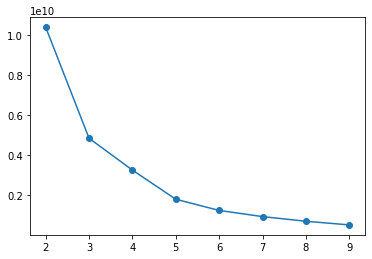

In [42]:
import matplotlib.pyplot as plt
plt.scatter(k, WCSS)
plt.plot(k, WCSS)

### Looking at above graph it seems that we can use 4 or 5 as k-value

In [43]:
km = KMeans(n_clusters=5)
model = km.fit(C)
C['cluster_label'] = model.labels_

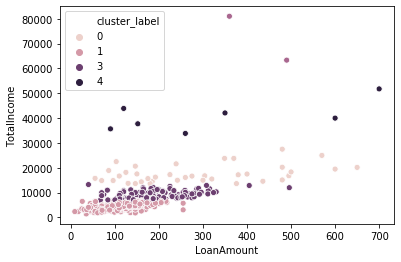

In [44]:
sb.scatterplot(C.LoanAmount, C.TotalIncome, hue=C.cluster_label)

# Now we can see the segmentation of customers in below plot in various colors